## Brief description of the data set and a summary of its attributes

The public dataset is acquired from the Kaggle website called Stroke Prediction Dataset. Excerpt description of the dataset:
<p>
"According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient."</p>

### Attribute Information

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.io.renderers.default = 'colab'

import os
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import plotly.io as pio
pio.renderers.default = "notebook+pdf"

In [2]:
path = os.getcwd()
data = pd.read_csv(path+"/data/healthcare-dataset-stroke-data.csv")

In [3]:
print(f" We have {data.shape[0]} rows and {data.shape[1]} columns")

 We have 5110 rows and 12 columns


Let's have a quick look at the first five values:

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<p>Immediately we see that there are NaN values in the bmi columns, therefore we would need to replace the missing values later.</p>

We now check which columns that have numerical values

In [7]:
num_cols = data.select_dtypes('number').columns

In [8]:
num_cols

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [9]:
data.select_dtypes('number')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [10]:
#Calculate missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Since ID is not a relevant feature, we will remove the column instead.

In [11]:
df = data.drop(['id'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df.replace(to_replace=np.nan, value=data.bmi.mean(), inplace=True)

Now we have replaced the missing values in the BMI column with the mean values.

In [13]:
#Verify if there's any missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Stroke risk factors

So let's evaluate the factors that could potentially increases the chances of getting a stroke. According to [Mayo Clinic's website](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113) and [NHLBI](https://www.nhlbi.nih.gov/health-topics/stroke), the risk factors include:

- High blood pressure (hypertension)
- Unhealthy diet/lifestyle habits
- Heart diseases
- Smoking
- Diabetes
- High cholesterol
- Age
- Race
- Gender
- Family history
- Work or home environment
- Physical inactivity
- Hormones

Based on the listed factors above, we will try to dissect relevant information for the following EDA. There are several factors from the list that are not found in the dataset, for example: physical inactivity, unhealthy diet/lifestyle habits, cholesterol and hormones. These additional features might provide additional insights but we will have to work with the current state of the dataset for now.

Let's start with some overview of the correlation between features:

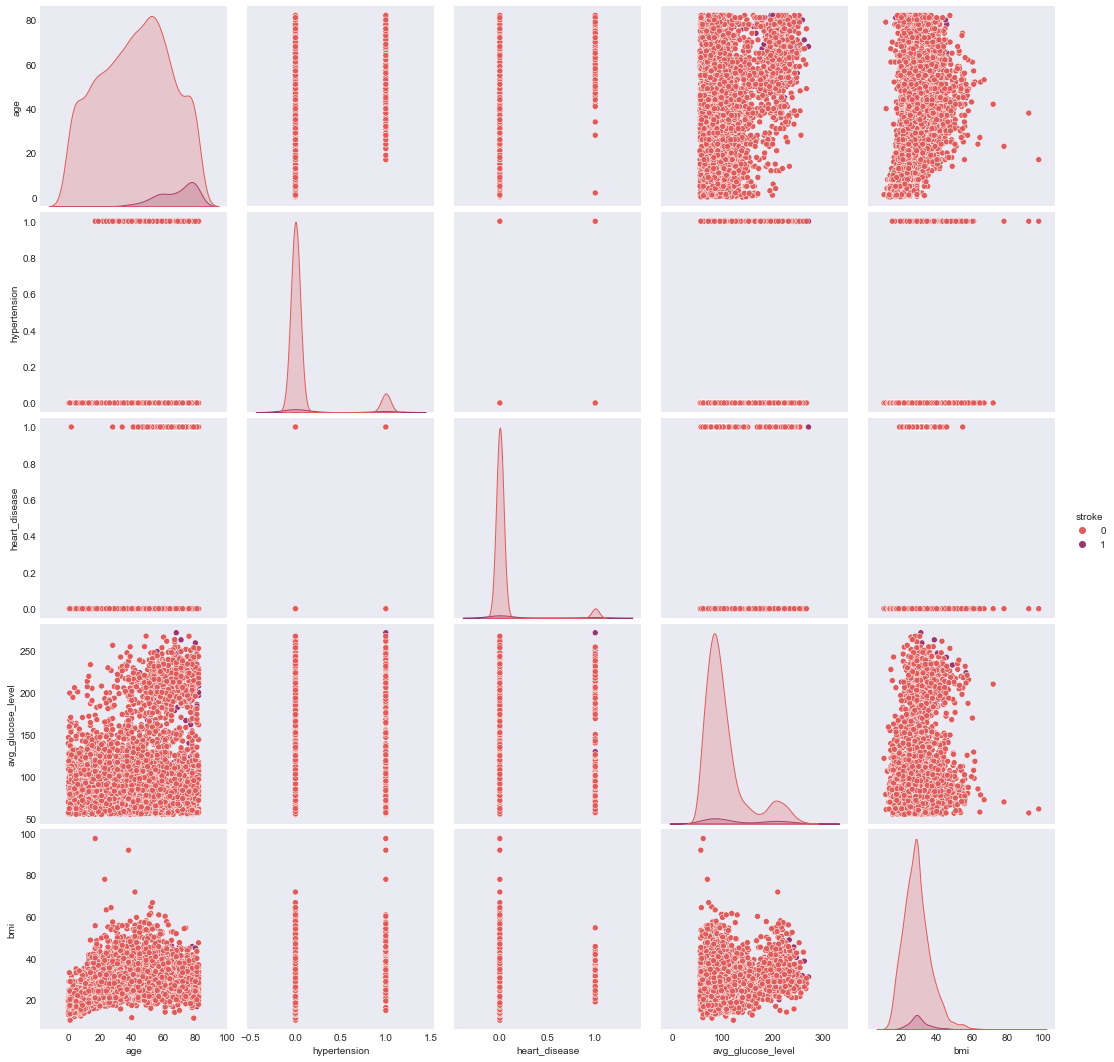

In [14]:
plt.style.use('seaborn-dark')
sns.pairplot(df, height=3, hue='stroke', palette='flare', plot_kws={"alpha":1.0})
plt.show()

<Figure size 720x360 with 0 Axes>

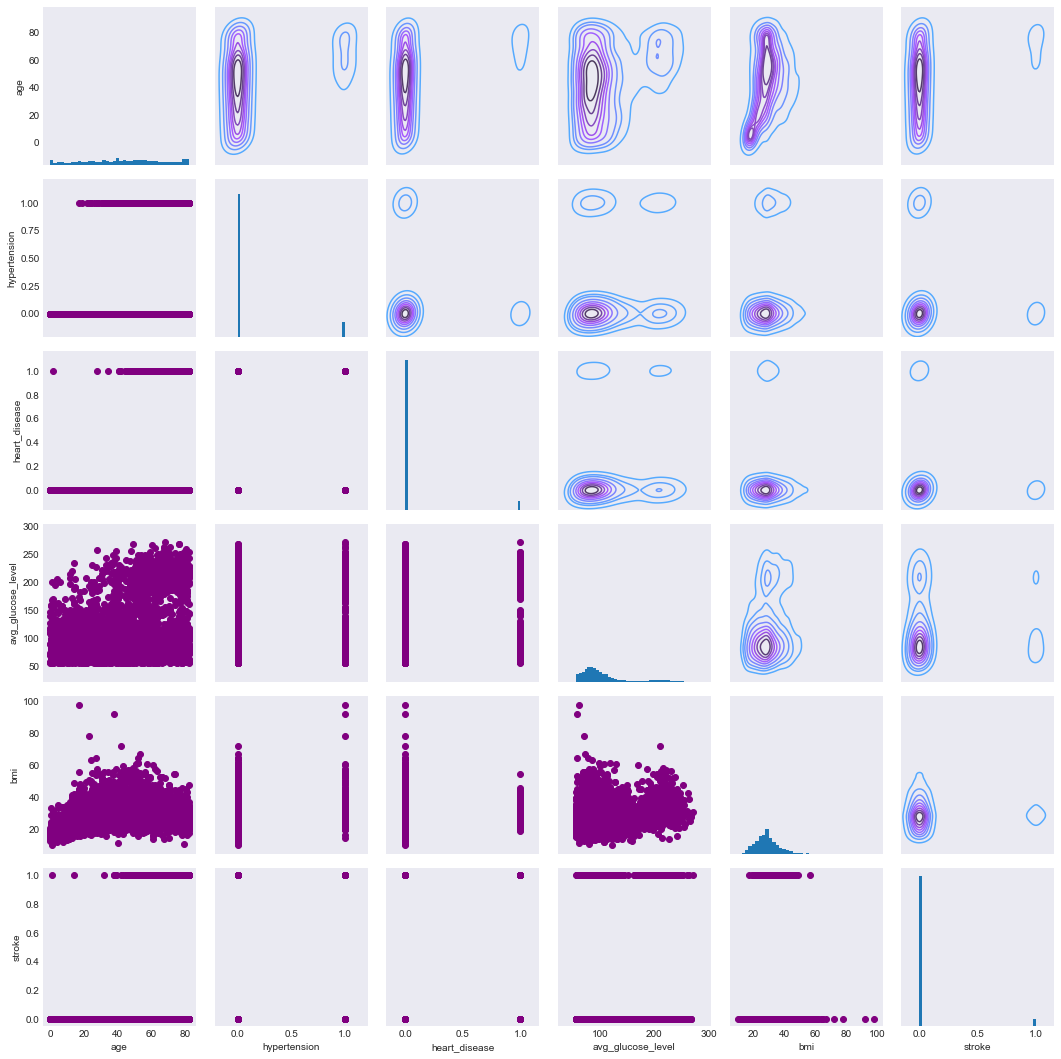

In [15]:

returns_fig = sns.PairGrid(df)
plt.figure(figsize=(10,5))

returns_fig.map_upper(sns.kdeplot,cmap='cool_d')
returns_fig.map_lower(plt.scatter,color='purple')
returns_fig.map_diag(plt.hist,bins=40)

plt.show()

## 1) Initial plan for data exploration

Based on the result of the pairplot above, we will heavily focus on the three numerical categories of the risk factors from the stroke predicition, namely <b>age, BMI</b> and <b>average glucose level</b> in terms of their distributions and various correlations.

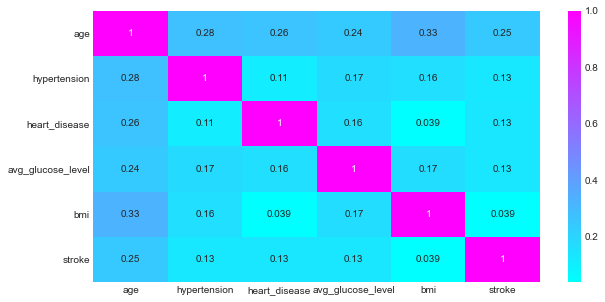

In [16]:
plt.figure(figsize=(10,5))

sns.heatmap(df.corr(),annot=True,cmap="cool")
plt.show()

### Proportion of stroke vs no stroke

<p><h4>Findings:</h4><p>
Based on the stroke proportion below, we can clearly see that we are dealing with an imbalanced dataset.

In [95]:
fig = px.pie(df,names='stroke', width=800, height=400)
fig.update_layout(title='<b>Proportion Of Stroke<b>')
fig.show()

### Gender
<h4>Findings:</h4>
There are slightly more female participants in our data. We also have 1 individual who either probably wished not to identify their gender or did not provide the information. Since this is a single outlier, we will drop it from the table. It seems that both male and female participants have almost equal chances of getting a stroke but interestingly female participants have slightly more chance of getting a stroke than men.

In [19]:
df.loc[df['gender'] == 'Other']


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [20]:
#We drop the row with 'Other' located at index 3116
df = df.drop(3116)

In [94]:
fig = px.pie(df,names='gender', width=800, height=400)
fig.update_layout(title='<b>Proportion Of Gender<b>')
fig.show()

In [22]:
pal = ["#58D3F7","#FA5858"]

<p></p>

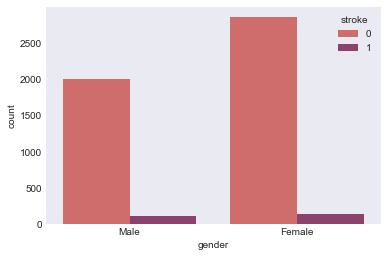

In [23]:
ax2 = sns.countplot(x=df.gender, hue=df.stroke, data=df, palette='flare')
plt.show()

In [24]:
pd.crosstab(df.work_type, df.gender)

gender,Female,Male
work_type,,
Govt_job,399,258
Never_worked,11,11
Private,1754,1170
Self-employed,504,315
children,326,361


In [25]:
pd.crosstab(df.stroke, df.gender)

gender,Female,Male
stroke,,
0,2853,2007
1,141,108


In [26]:
children = adolescence = young_adult = mid_adult = old = 0
for age in df.age:
    if round(age)<12:
        children+=1
    if round(age)>=12 and round(age)<=18:
        adolescence+=1
    if round(age)>18 and round(age)<=31:
        young_adult+=1
    if round(age)>31 and round(age)<=45:
        mid_adult+=1
    if round(age)>45:
        old+=1

labels = ['Children', 'adolescence', 'young_adult', 'mid_adult', 'old']
ages = [children, adolescence, young_adult, mid_adult, old]

print(f"Children:{children}\nAdolescence: {adolescence}\nYoung adult:{young_adult} \
\nMiddle age:{mid_adult}\nSenior: {old}")

df_age = pd.DataFrame(ages, columns=['age'])

fig = go.Figure(data=[go.Pie(labels=labels, values=ages, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

Children:543
Adolescence: 373
Young adult:732 
Middle age:969
Senior: 2492


### Marriage Status

<p><h4>Findings:</h4></p>
<p>Marriage status is not part of the risk factor list but since home environment is factor, can we safely say that marriage status is also part of home environment? For the sake of argument, we will analyze it anyway. Based on the chart, 65.6% of the participants have been married. Upon closer inspection, married participants has a lot of more stroke cases than single participants. Maybe we can include marriage status as part of the risk factor.</p>

In [27]:
fig = px.pie(df,names='ever_married', width=800, height=400)
fig.update_layout(title='<b>Proportion Of Marriage Status<b>')
fig.show()

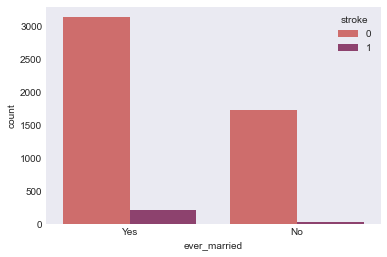

In [28]:
ax2 = sns.countplot(x=df.ever_married, hue=df.stroke, data=df, palette='flare')
plt.show()

In [29]:
pd.crosstab(df.stroke, df.ever_married)

ever_married,No,Yes
stroke,,
0,1727,3133
1,29,220



### Residence Type


<h4>Findings:</h4>
We also have an even split of participants who live in urban and rural areas. Also, both environments have almost the same proportion of stroke cases.


<p></p>

In [30]:
fig = px.pie(df,names='Residence_type', width=800, height=400)
fig.update_layout(title='<b>Proportion Of Residence Type<b>')
fig.show()

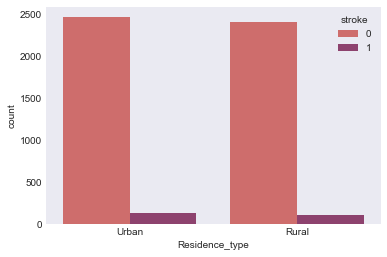

In [31]:
ax2 = sns.countplot(x=df.Residence_type, hue=df.stroke, data=df, palette='flare')
plt.show()

In [32]:
pd.crosstab(df.stroke, df.Residence_type)

Residence_type,Rural,Urban
stroke,,
0,2399,2461
1,114,135


<p></p>

#### Employment Status

<h4>Findings:</h4>

It seems that the majority of the survey participants are working in the private sector with 57.2%. In general however, the data does not specify what kind of industry that these participants are in. Such information is important because different work environments may provide some clues as to which profession that could have higher potential risks of stroke. Also, it is suprising to see children are included in the data making up 13.4% of the population. We may need some further clarification from the data's owner and medical experts in regards to such inclusion.

In [33]:
fig = px.pie(df,names='work_type', width=800, height=400)
fig.update_layout(title='<b>Proportion Of Employment Type<b>')
fig.show()

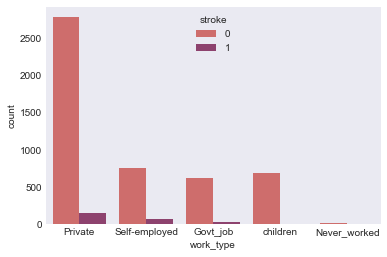

In [34]:
ax = sns.countplot(x=df.work_type, hue=df.stroke, data=df, palette='flare')
plt.show()

In [35]:
pd.crosstab(df.stroke, df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624,22,2775,754,685
1,33,0,149,65,2


### Smoking status
<p><h4>Findings:</h4></p>
<p>
We investigate the number of participants who were former smokers, current smokers or none smokers. The unknown group poses a bit of problem in our anaylsis because their status does not provide any meaningful contribution. We could assume that they may be casual smokers, but that is just an assumption nonetheless. Removing the unknown group from our analysis might not be a good idea because it is accounted for 30% of the population.</p>

<p>Based on the pie chart below, we have more non-smokers in the survey with 37% while 30% are smokers. Additionally, based on the proportion of gender, it shows that we have more female smokers than men. But the most surprising finding is that the non smokers have slightly higher percentage of stroke.</p>

In [36]:
fig = px.pie(df,names='smoking_status', width=800, height=400)
fig.update_layout(title='<b>Proportion Of Smoking Status<b>')
fig.show()

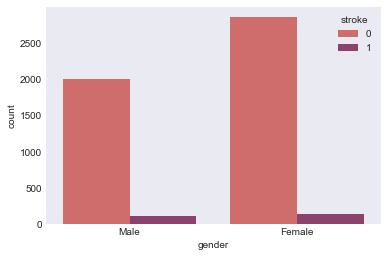

In [37]:
sns.countplot(x=df.gender, hue=df.stroke, data=df, palette='flare')
plt.show()

### Smoking status based on residence
We also want to know the residential status of the participants who are actually smokers and non-smokers. Surprisingly we find that non-smokers are more susceptible to having stroke than smokers.

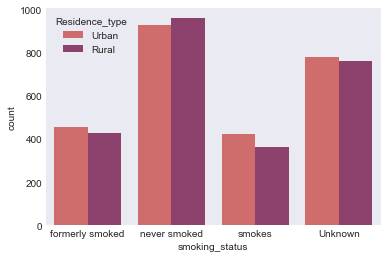

In [38]:
sns.countplot(x=df.smoking_status, hue=df.Residence_type, data=df, palette='flare')
plt.show()

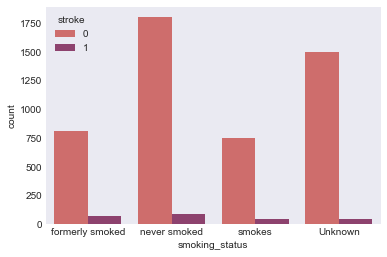

In [39]:
sns.countplot(x=df.smoking_status, hue=df.stroke, data=df, palette='flare')
plt.show()

In [40]:
pd.crosstab(df.stroke, df.smoking_status)

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,814,1802,747
1,47,70,90,42


### Heart Disease

<Figure size 360x360 with 0 Axes>

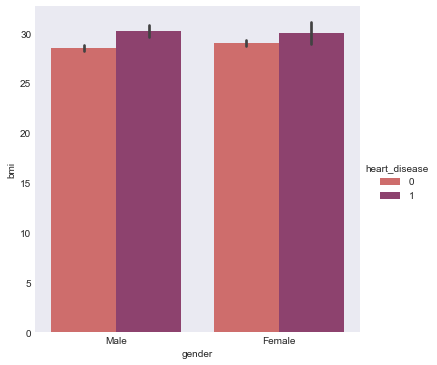

In [91]:

plt.figure(figsize=(5,5))
sns.catplot(x="gender", y="bmi", hue="heart_disease", palette="flare", kind="bar", data=df)
plt.show()

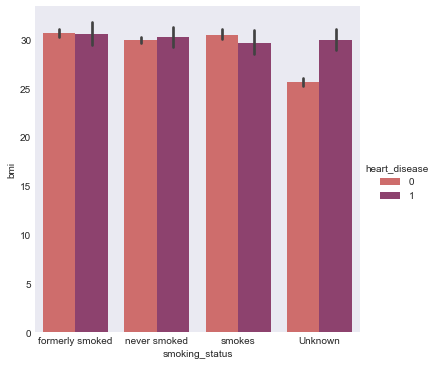

In [42]:
sns.catplot(x="smoking_status", y="bmi", hue="heart_disease", palette="flare", kind="bar", data=df)
plt.show()

### Analysis of distribution for numerical risk factors: Age, BMI, Average of Glucose Level

<p><h4>Findings:</h4><p>

<p>The average age of the participants is 43 years old with the maximum oldest at 82, with 46.8% total of senior participants. The mean BMI from the participants is 28.89 and this means that they are generally in the over-weight category (please refer the BMI classification from <a href="https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html">CDC website</a>). The mean for average glucose level is 106.15mg/dL, which indicating that on average the participants are pre-diabetic (according to <a href="https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451">Mayo Clinic</a>).</p>
    
<p>
Age, BMI and glucose level are considered to be important features in our data as they are some of the common risk factors for having a stroke. We can see that a lot of the features are not normally distributed. The 'age' features seemed to be multimodal while the BMI and 'average glucose level' distributions are both positively skewed.</p>



The following BMI classification is based on the <a href="https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html">CDC website.</a>

In [43]:
#BMI classification according to CDC website

bmi_data = { 'BMI':['Below 18.5', '18.5 – 24.9', '25.0 – 29.9', '30.0 and Above'], \
'Weight Status': ['Underweight', 'Normal', 'Over-weight', 'Obese']} 

bmi_df = pd.DataFrame(bmi_data)

bmi_df

,BMI,Weight Status
0,Below 18.5,Underweight
1,18.5 – 24.9,Normal
2,25.0 – 29.9,Over-weight
3,30.0 and Above,Obese


Since our features have different ranges of distribution all across the board, it is necessary to conduct data transformation as part of data cleaning. However, transforming data is not always necessary and sometimes some of the distribution may not be succesfully transformed at all.

In [44]:
skew_feats = df.skew().sort_values(ascending=False)
skewness = pd.DataFrame({"Skew":skew_feats})

skewness

,Skew
stroke,4.192807
heart_disease,3.946786
hypertension,2.715026
avg_glucose_level,1.572815
bmi,1.076458
age,-0.137430


### BMI distribution

In [45]:
def check_histo(data, x):
    sns.histplot(data=data, x=x, hue='stroke', multiple="stack", kde=True)
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(data[x].mean(), color='red', linestyle='-', linewidth=0.8)
    plt.text(data[x].mean()*1.05, max_ylim*0.9, 'Mean (μ): {:.2f}'.format(data[x].mean()))
    plt.show()

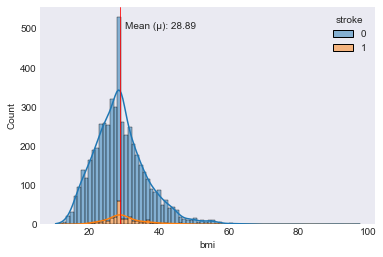

In [46]:
check_histo(df, 'bmi')

In [47]:
print("Mean, median, max and min BMI report:\n")
print(f"Mean bmi: {df['bmi'].mean()}\nMedian bmi: {df['bmi'].median()}\nMax bmi: \
{df['bmi'].max()}\nMin bmi: {df['bmi'].min()}")

Mean, median, max and min BMI report:

Mean bmi: 28.894507852666028
Median bmi: 28.4
Max bmi: 97.6
Min bmi: 10.3


In [48]:
bmi_log = np.log(df['bmi'])
bmi_log.skew()

-0.015111041687523344

### Average glucose level distribution

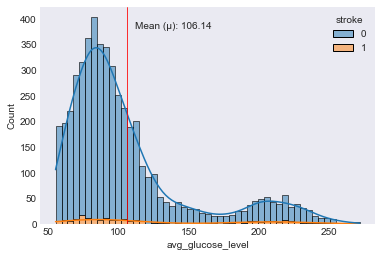

In [49]:
check_histo(df, 'avg_glucose_level')

In [50]:
print(f"Mean avg_glucose_level: {df['avg_glucose_level'].mean()}\nMedian avg_glucose_level: {df['avg_glucose_level'].median()}\nMax avg_glucose_level: \
{df['avg_glucose_level'].max()}\nMin avg_glucose_level: {df['avg_glucose_level'].min()}")

Mean avg_glucose_level: 106.14039929536114
Median avg_glucose_level: 91.88
Max avg_glucose_level: 271.74
Min avg_glucose_level: 55.12


In [51]:
log_agl = np.log(df['avg_glucose_level'])
log_agl.skew()

0.8833306529678565

### Age distribution

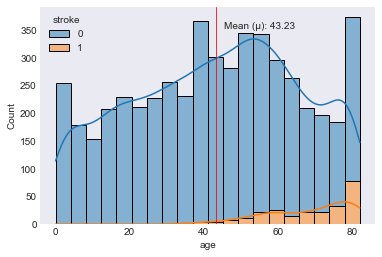

In [52]:
check_histo(df, 'age')

In [53]:
print("Mean, median, max and min age report:")
print(f"Mean: {round(df['age'].mean())}\nMedian: {round(df['age'].median())}\nMax age: \
{round(df['age'].max())}\nMin age: {round(df['age'].min())}")

Mean, median, max and min age report:
Mean: 43
Median: 45
Max age: 82
Min age: 0


In [54]:
df_age = df['age'].apply(np.ceil)

In [55]:
age_log = np.log(df_age)
age_log.skew()

-1.801249441979412

## 2) Actions taken for data cleaning and feature engineering

1. Dropped ID column as it is not an important feature
2. Binned the age into respective age groups (children, adolescence, young_adult, mid_adult, old)
3. Imputed the missing data in BMI column by calculating the mean values
4. We check for the skewness of the distribution
5. In the significant test below, we will take some sample of the population that balances the proportion of stroke vs no-stroke 

## 3) Key findings and insights:

In-depth findings and insights can be found in the respective sections above but here is a quick summary:

1. The dataset is clearly imbalanced in terms of proportion of people having a stroke: 95% of the population reported as healthy vs 5% reported as stroke-potential
2. The population of the datasets are generally over-weight
3. Older age(above 40), average glucose level and BMI are three strong risk factors that could contribute to a potential stroke
4. As people get older, their BMI value increases which logically explains the obesity for most older people (and also the reason why we should try to keep ourselves fit as we get older)
5. Non smokers seemed to have higher possibility to have a stroke than non-smokers. But this can be considered to be an uncertain hypothesis since the unknown group (which accounted for 30% of the population) did not specify their smoking status.

## 4) Formulation of hypothesis

We already know that the age, bmi and glucose levels contributed a huge risk factor, so we will formulate several hypotheseses that has a combination of risk factors may or may not increase the risk factor of getting a stroke:

<p><h4>Hypothesis 1:</h4></p>
<p>Participants who has hypertension with high BMI and high average glucose level are more likely to get a stroke than participants with high BMI and high average glucose level only</p>

<p><h4>Hypothesis 2:</h4></p>
<p>Participants above 40 years old who are non-smokers but with high BMI and high average glucose level are as likely to get a stroke as smokers with similar conditions  </p>

<p><h4>Hypothesis 3:</h4></p>
<p>Participants who are below 40 years old but has high BMI and high average glucose level are likely to get a stroke as older participants with similar conditions</p>

## 5) Formal significance test on one of the hypotheses

We will choose to conduct significance test against Hypothesis 2. 

<p><b>Our null hypothesis is:</b></p>
<p>
    
Participants above 40 years old who are non-smokers but with high BMI and high average glucose level <b>has similar chance</b> to get a stroke as smokers with similar condition
</p>

<p><b>and our alternative hypothesis would be:</b></p>

<p>
Participants above 40 years old who are non-smokers but with high BMI and high average glucose level <b>has higher chance</b> to get a stroke than non-smokers with similar condition
</p>


We will start by creating n=400 samples from the original dataset. For this sample, we allocate the number of stroke vs no stroke participants evenly and combine them together as part of one dataset. Then we will take another sample from that dataset who are over 40 years old with stroke case and then finally perform the significant test with a two sampled z-test since we are selecting two independent groups (smokers and non smokers).

<p></p>

In [56]:
with_strokes = pd.DataFrame(df.loc[df['stroke'] == 1])

In [57]:
with_strokes.shape

(249, 11)

In [58]:
smoking_status_dict = {'Unknown': 4, 'never smoked': 0, 'formerly smoked':3, 'smokes': 1}

with_strokes['smoking_status'] = with_strokes['smoking_status'].map(smoking_status_dict)

In [59]:
rand_with_strokes = pd.DataFrame(with_strokes.sample(200))

Now let's some samples where the population has no stroke:

In [60]:
without_strokes = pd.DataFrame(df.loc[df['stroke'] == 0])

In [61]:
without_strokes['smoking_status'] = without_strokes['smoking_status'].map(smoking_status_dict)

In [62]:
rand_without_strokes = pd.DataFrame(without_strokes.sample(200))

Then we concatenate both dataframes:

In [63]:
with_and_without_strokes = [rand_with_strokes, rand_without_strokes]

sample_small_population = pd.concat(with_and_without_strokes)

In [64]:
print(f"We have {sample_small_population.shape[0]} total samples")

We have 400 total samples


In [65]:
def check_histo(data, x):
    sns.histplot(data=data, x=x, hue='stroke', multiple="stack", kde=True)
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(data[x].mean(), color='red', linestyle='-', linewidth=0.8)
    plt.text(data[x].mean()*1.05, max_ylim*0.9, 'Mean (μ): {:.2f}'.format(data[x].mean()))
    plt.show()

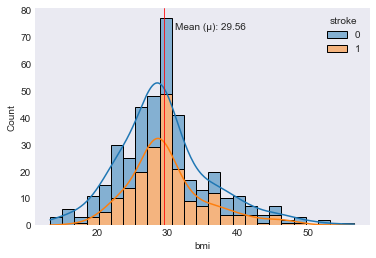

In [66]:
check_histo(sample_small_population, 'bmi')

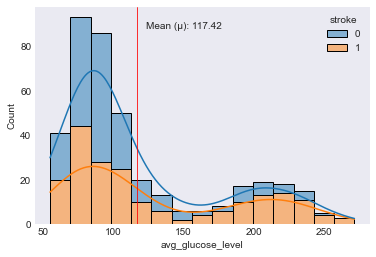

In [67]:
check_histo(sample_small_population, 'avg_glucose_level')

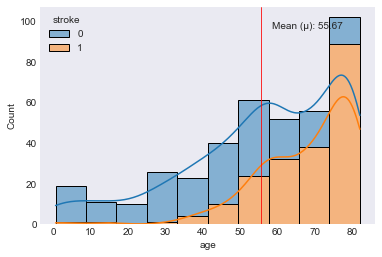

In [68]:
check_histo(sample_small_population, 'age')

In [69]:
#So now we take some population of those aged 40 and above
above_forty = pd.DataFrame(sample_small_population.loc[sample_small_population['age'] >= 40])

In [70]:
print(f"We have {above_forty.shape[0]} rows from the population above the age of 40")

We have 318 rows from the population above the age of 40


In [71]:
#Then we take all of the smokers and non smokers who have stroke
all_smokers = pd.DataFrame(above_forty[(above_forty['smoking_status'] == 1) & (above_forty['stroke'] == 1)])
all_non_smokers = pd.DataFrame(above_forty[(above_forty['smoking_status'] == 0) & (above_forty['stroke'] == 1)])

In [72]:
#Then we combine them together to create another dataframe
smokers_non_smokers = [all_smokers, all_non_smokers]
strokes_above_forty = pd.concat(smokers_non_smokers)

In [73]:
total_samples = strokes_above_forty.shape[0]
print(f"Total samples: {total_samples}")

Total samples: 105


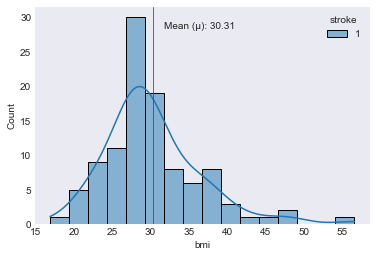

In [74]:
check_histo(strokes_above_forty, 'bmi')

Based on the BMI index, we know that those with BMI of 30 and above are obese. In this case, it matches with the risk factor that we have proposed in the hypothesis.

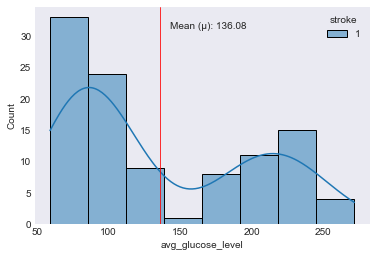

In [75]:
check_histo(strokes_above_forty, 'avg_glucose_level')

So the mean average glucose levels are 134.91, that indicates that our stroke participants are pre-diabetic.

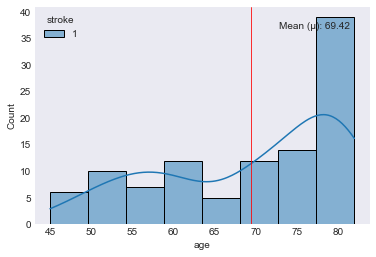

In [76]:
check_histo(strokes_above_forty, 'age')

The mean age in this particular is 68 but the distribution is obviously negatively skewed as we have more stroke cases with people aged 80.

In [77]:
sample_size = 80
sample = pd.DataFrame(strokes_above_forty.sample(sample_size))

In [78]:
mean_age_smokers = round((all_smokers['age']).mean())
print(f"Mean age for smokers:\n{mean_age_smokers}")

Mean age for smokers:
64


In [79]:
mean_age_non_smokers = round((all_non_smokers['age']).mean())
print(f"Mean age for non smokers:\n{mean_age_non_smokers}")

Mean age for non smokers:
72


In [80]:
mean_smokers = (sample['smoking_status'] == 1).mean()

In [81]:
mean_non_smokers = (sample['smoking_status'] == 0).mean()

In [82]:
m = mean_non_smokers - mean_smokers
mean_val = round(m,2)

In [83]:
print(f"Our current sample_size for z-test: {sample_size} out of {total_samples}")

Our current sample_size for z-test: 80 out of 105


In [84]:

_ ,pval = stests.ztest(sample['smoking_status'] == 0, x2=sample['smoking_status'] == 1, value=mean_val, alternative='two-sided')
print(f"P-values: {pval}")

if pval < 0.05:
   print(f"We are rejecting null hypothesis")
else:
  print(f"We are accepting null hypothesis")

P-values: 1.0
We are accepting null hypothesis


<p></p>

Here we have accepting the null hypothesis whereby participants above 40 years old who are non-smokers but with high BMI and high average glucose level has similar likelihood to get a stroke as smokers with similar condition. However, there are some caveats to watch out for:
1. The sample was taken from a balanced but much smaller dataset. The original dataset has far more non-stroke cases than stroke cases.
2. The dataset was not normally distributed; it has skewing and bimodal distributions
3. 30% of the dataset has "unknown" smoking status group
4. 40 years old is an arbitrarily selected age. We may have to perform several other hypothesis with other age groups, for example lower those in their 20s or 30s.

## 6) Suggestions for next steps in analyzing this data

In the next steps:

1) We would need to finding a way to handle the imbalanced stroke vs non-stroke classes. This can be rectified with oversampling techniques such as SMOTE and random sampling.
2) Perform another significant test after oversampling the dataset
3) Gather for more data if possible

## 7) Summary of the quality of this dataset

Overall, the dataset provides several features that are relevant and usable for stroke patient analysis despite including some of the more generic and common risk factors. 30% of the population from the smoking_status category did not explicitly tell their smoking preference; this information would have shed some more light on the correlation between smoking habits and stroke (if any) especially in our hypothesis testing. The dataset can be improved by rectifying the imbalanced stroke vs non-stroke categories.